# Group Assignment: Census Data Exploration

*By Jacob Basinger*

In this assignment, I will conduct a preliminary exploration of housing unit and income data in New York City.  Specifically, I will look at the occupancy status of units in the City, and per capita incomes based on census tracts.

## Library and Data Importation

To begin, I must import the relevant libraries and my data.

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

The above cell imported the pandas, geopandas, contextily, and plot libraries.

In [2]:
occupancy = gpd.read_file('occupancy.geojson')
income = gpd.read_file('income.geojson')

Then I imported the census data on occupancy status and per capita income.

## Data Exploration

First I will check out the data.

In [4]:
occupancy.head()

,geoid,name,B25002001,"B25002001, Error",B25002002,"B25002002, Error",B25002003,"B25002003, Error",geometry
0,01000US,United States,137428986.0,6044.0,120756048.0,236892.0,16672938.0,231631.0,"MULTIPOLYGON (((-168.22527 -14.53591, -168.199..."
1,04000US36,New York,8322722.0,916.0,7343234.0,14943.0,979488.0,14479.0,"MULTIPOLYGON (((-79.31214 42.68680, -79.24977 ..."
2,05000US36081,"Queens County, NY",859529.0,520.0,778932.0,2366.0,80597.0,2179.0,"MULTIPOLYGON (((-74.03813 40.53829, -74.03749 ..."
3,14000US36005000100,"Census Tract 1, Bronx, NY",0.0,17.0,0.0,17.0,0.0,17.0,"MULTIPOLYGON (((-73.89772 40.79514, -73.89611 ..."
4,14000US36005000200,"Census Tract 2, Bronx, NY",1499.0,56.0,1342.0,78.0,157.0,61.0,"MULTIPOLYGON (((-73.86522 40.81453, -73.86425 ..."


In [5]:
occupancy.tail()

,geoid,name,B25002001,"B25002001, Error",B25002002,"B25002002, Error",B25002003,"B25002003, Error",geometry
2167,14000US36085031902,"Census Tract 319.02, Richmond, NY",1856.0,102.0,1641.0,139.0,215.0,99.0,"MULTIPOLYGON (((-74.17129 40.64052, -74.17118 ..."
2168,14000US36085032300,"Census Tract 323, Richmond, NY",506.0,25.0,451.0,44.0,55.0,36.0,"MULTIPOLYGON (((-74.19709 40.63574, -74.19706 ..."
2169,14000US36085990100,"Census Tract 9901, Richmond, NY",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-74.25909 40.49956, -74.25909 ..."
2170,16000US3651000,"New York, NY",3494228.0,1138.0,3167034.0,7508.0,327194.0,7056.0,"MULTIPOLYGON (((-74.04075 40.70017, -74.04073 ..."
2171,31000US35620,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",7717242.0,1436.0,6997001.0,13462.0,720241.0,12640.0,"MULTIPOLYGON (((-74.88982 40.78773, -74.88971 ..."


In [6]:
occupancy.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2172 non-null   object  
 1   name              2172 non-null   object  
 2   B25002001         2172 non-null   float64 
 3   B25002001, Error  2172 non-null   float64 
 4   B25002002         2172 non-null   float64 
 5   B25002002, Error  2172 non-null   float64 
 6   B25002003         2172 non-null   float64 
 7   B25002003, Error  2172 non-null   float64 
 8   geometry          2172 non-null   geometry
dtypes: float64(6), geometry(1), object(2)
memory usage: 152.8+ KB


In [8]:
occupancy.shape

(2172, 9)

## Cleaning the Data

It looks like our data includes rows for the country, county, city, and metro areas so we will have to drop all of those to keep just the census tract data.  However, these summary rows were not just located at the very beginning/head of the dataset, as seen in the head and tail commands above.  I decided that I would sort the data based on length of geoid so that I can drop all of the rows that have FIPS codes that are not for the census tract level.

In [44]:
occupancy['geoidlength'] = occupancy.geoid.str.len()

First, I added a new column that lists out the length of each FIPS code.  Then, I sorted the data based on that column.

In [45]:
occupancy_sorted = occupancy.sort_values(by='geoidlength' , ascending = True)

In [47]:
occupancy_sorted.head(10)

,geoid,name,B25002001,"B25002001, Error",B25002002,"B25002002, Error",B25002003,"B25002003, Error",geometry,geoidlength
0,01000US,United States,137428986.0,6044.0,120756048.0,236892.0,16672938.0,231631.0,"MULTIPOLYGON (((-168.22527 -14.53591, -168.199...",7
1,04000US36,New York,8322722.0,916.0,7343234.0,14943.0,979488.0,14479.0,"MULTIPOLYGON (((-79.31214 42.68680, -79.24977 ...",9
2171,31000US35620,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",7717242.0,1436.0,6997001.0,13462.0,720241.0,12640.0,"MULTIPOLYGON (((-74.88982 40.78773, -74.88971 ...",12
2,05000US36081,"Queens County, NY",859529.0,520.0,778932.0,2366.0,80597.0,2179.0,"MULTIPOLYGON (((-74.03813 40.53829, -74.03749 ...",12
2170,16000US3651000,"New York, NY",3494228.0,1138.0,3167034.0,7508.0,327194.0,7056.0,"MULTIPOLYGON (((-74.04075 40.70017, -74.04073 ...",14
1456,14000US36081009700,"Census Tract 97, Queens, NY",1675.0,55.0,1471.0,101.0,204.0,93.0,"MULTIPOLYGON (((-73.92200 40.77795, -73.92140 ...",18
1455,14000US36081009600,"Census Tract 96, Queens, NY",939.0,60.0,925.0,61.0,14.0,22.0,"MULTIPOLYGON (((-73.83506 40.68301, -73.83458 ...",18
1454,14000US36081009500,"Census Tract 95, Queens, NY",1087.0,23.0,850.0,60.0,237.0,56.0,"MULTIPOLYGON (((-73.92339 40.77509, -73.92327 ...",18
1453,14000US36081009400,"Census Tract 94, Queens, NY",840.0,64.0,716.0,73.0,124.0,49.0,"MULTIPOLYGON (((-73.83953 40.68126, -73.83865 ...",18
1452,14000US36081009100,"Census Tract 91, Queens, NY",1445.0,47.0,1087.0,128.0,358.0,112.0,"MULTIPOLYGON (((-73.93551 40.77754, -73.93508 ...",18


As you can see above, there are five rows with summary data that need to be deleted.  I could use the occupancy_sorted list for the rest of the assignment, but I decided to delete the rows in the occupancy dataset based on the row numbers provided in the output above (so that I would not have to type as much for my variables going forward).  The row numbers are 0, 1, 2, 2170, and 2171.

I then redefined the occupancy dataset to not include those rows that have the summary statistics.

In [55]:
occupancy = occupancy.drop([0 , 1 , 2 , 2170 , 2171])

KeyError: '[   0    1    2 2170 2171] not found in axis'

In [56]:
occupancy.sort_values(by='geoidlength',ascending = True)

,geoid,name,B25002001,"B25002001, Error",B25002002,"B25002002, Error",B25002003,"B25002003, Error",geometry,geoidlength
3,14000US36005000100,"Census Tract 1, Bronx, NY",0.0,17.0,0.0,17.0,0.0,17.0,"MULTIPOLYGON (((-73.89772 40.79514, -73.89611 ...",18
1455,14000US36081009600,"Census Tract 96, Queens, NY",939.0,60.0,925.0,61.0,14.0,22.0,"MULTIPOLYGON (((-73.83506 40.68301, -73.83458 ...",18
1454,14000US36081009500,"Census Tract 95, Queens, NY",1087.0,23.0,850.0,60.0,237.0,56.0,"MULTIPOLYGON (((-73.92339 40.77509, -73.92327 ...",18
1453,14000US36081009400,"Census Tract 94, Queens, NY",840.0,64.0,716.0,73.0,124.0,49.0,"MULTIPOLYGON (((-73.83953 40.68126, -73.83865 ...",18
1452,14000US36081009100,"Census Tract 91, Queens, NY",1445.0,47.0,1087.0,128.0,358.0,112.0,"MULTIPOLYGON (((-73.93551 40.77754, -73.93508 ...",18
...,...,...,...,...,...,...,...,...,...,...
717,14000US36047043600,"Census Tract 436, Kings, NY",1669.0,53.0,1611.0,80.0,58.0,61.0,"MULTIPOLYGON (((-73.98081 40.61445, -73.98022 ...",18
716,14000US36047043500,"Census Tract 435, Kings, NY",1592.0,55.0,1502.0,91.0,90.0,66.0,"MULTIPOLYGON (((-73.91556 40.69492, -73.91411 ...",18
715,14000US36047043400,"Census Tract 434, Kings, NY",1351.0,73.0,1265.0,78.0,86.0,69.0,"MULTIPOLYGON (((-73.97921 40.61250, -73.97847 ...",18
729,14000US36047044800,"Census Tract 448, Kings, NY",759.0,54.0,654.0,58.0,105.0,58.0,"MULTIPOLYGON (((-73.97775 40.61740, -73.97757 ...",18


As you can see above, there are no longer any rows with geoids of a different length.  I then ran the plot command just to double check that I was only left with the census tract data, which you can see is true below.

<AxesSubplot:>

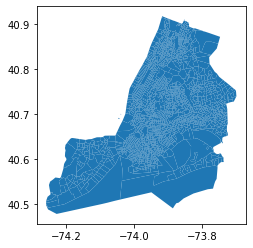

In [57]:
occupancy.plot()